# Visualize

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,  preprocess_input
from tensorflow.keras.applications import VGG19
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2 
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [ ]:
BASE_PATH = '/content/drive/MyDrive/Yoga_Dataset/'

In [ ]:
filenames,labels = [],[]

for dirname in os.listdir(f'{BASE_PATH}TRAIN'):
    for file in os.listdir(f'{BASE_PATH}TRAIN/{dirname}'):
        filenames.append(file)
        labels.append(dirname)

df_train = pd.DataFrame(data={
    'filename': filenames,
    'labels': labels
})

In [ ]:
df_train.labels.value_counts()

plank       266
warrior2    252
downdog     223
goddess     180
tree        160
Name: labels, dtype: int64

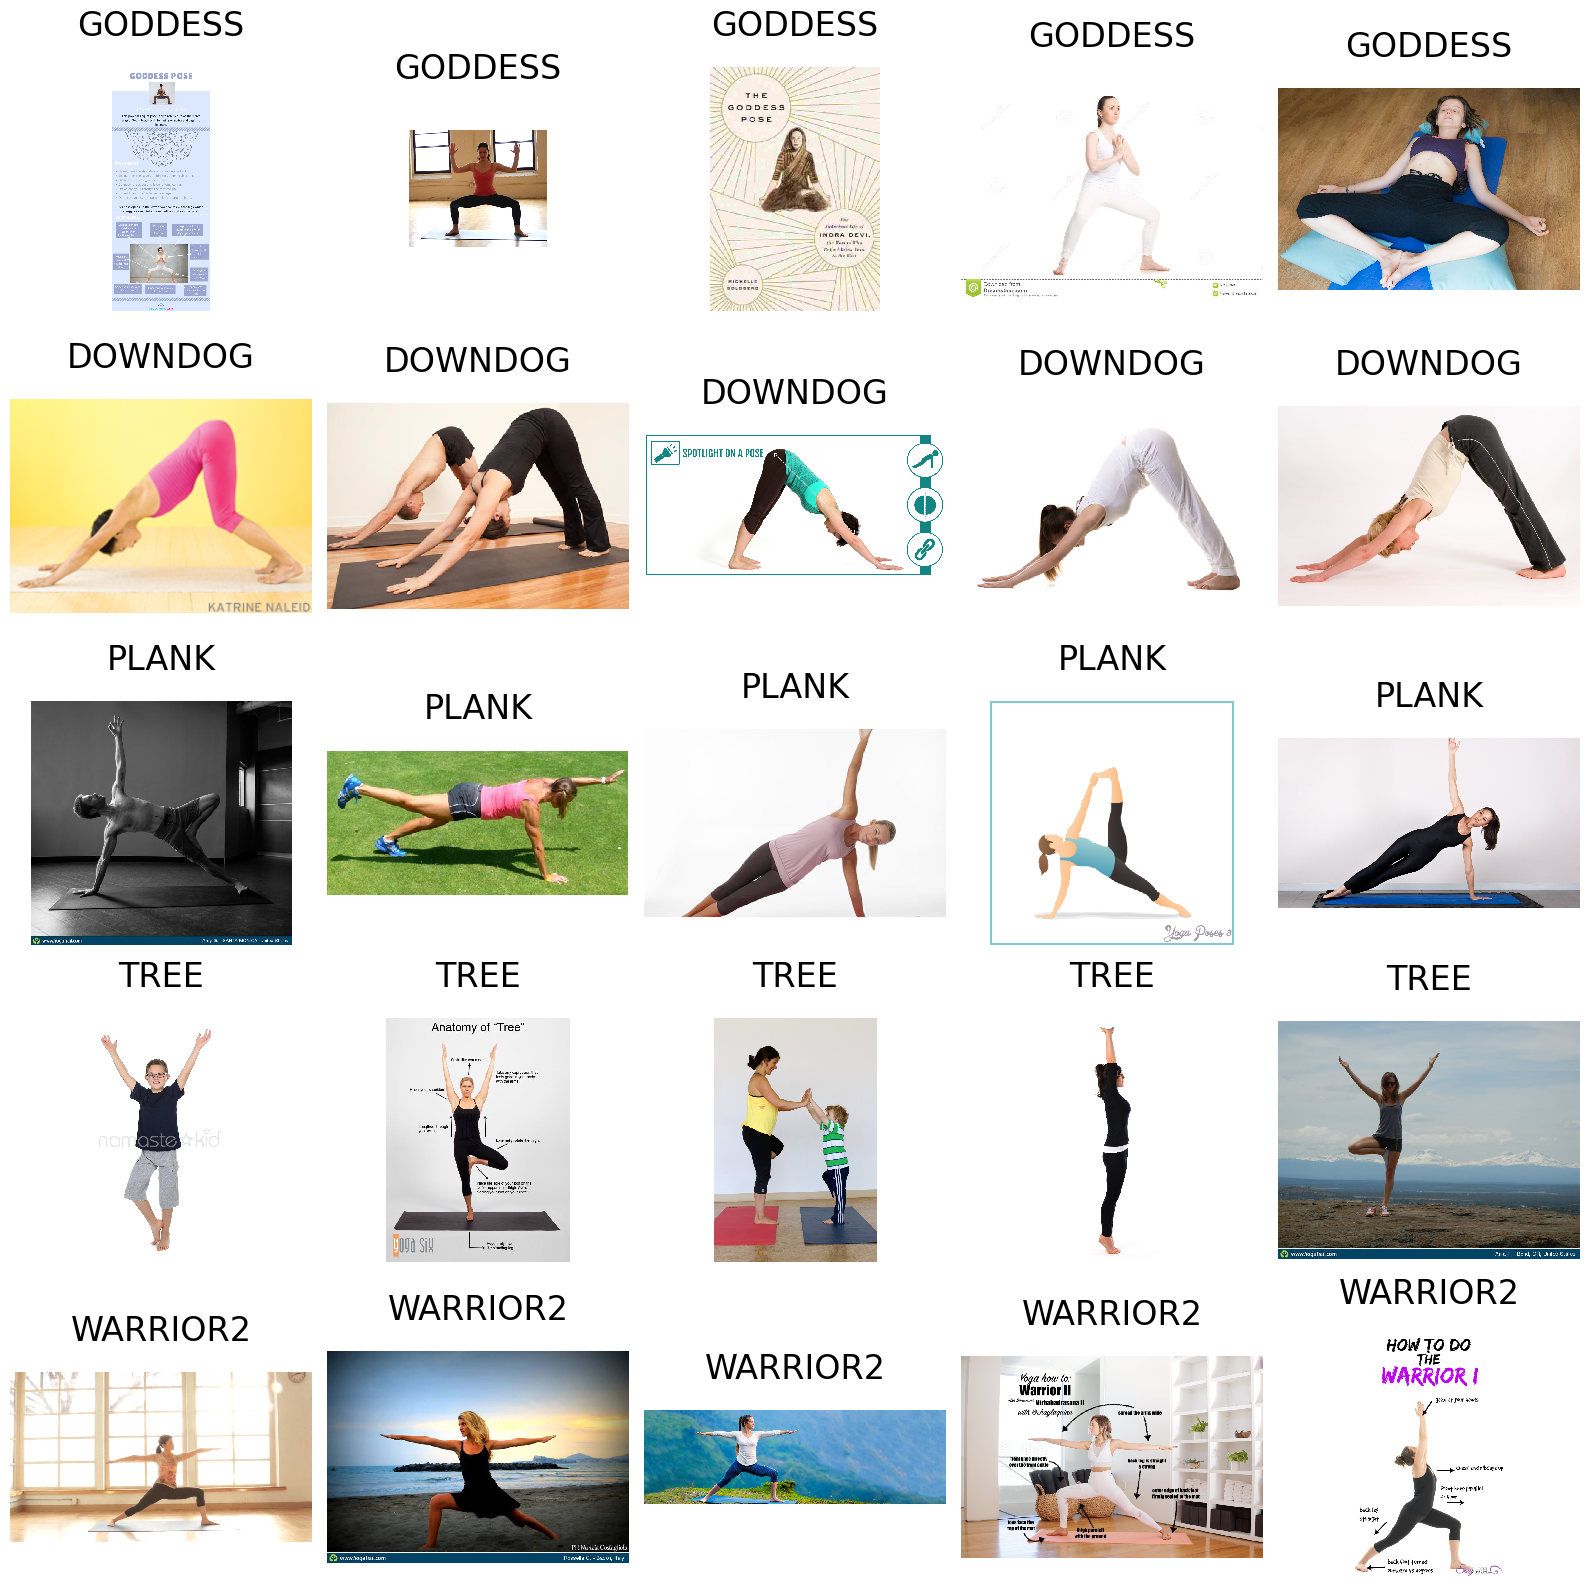

In [ ]:
rows = 5
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
for i, row in enumerate(list(df_train.labels.unique())):
    for j, filename in enumerate(df_train[df_train.labels == row]['filename'].tolist()[:cols]):
        img = load_img(os.path.join(BASE_PATH,'TRAIN',row, filename))
        axs[i,j].matshow(img)
        axs[i,j].axis('off')
        axs[i,j].set_title(row.upper(), fontsize=24)
fig.tight_layout()

# Classic Classifaction

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 4
target_size = (64, 64)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    )

train_generator = train_datagen.flow_from_directory(
        r'D:\University\Computer Vision\Project\Datasets\DATASET\TRAIN',  
        target_size=target_size,  
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=True
        ,color_mode='grayscale')  

test_generator = test_datagen.flow_from_directory(
        r'D:\University\Computer Vision\Project\Datasets\DATASET\TEST',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False,
        class_mode='sparse'
        ,color_mode='grayscale')

Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [ ]:
import numpy as np
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator

cell_size = (8, 8)  # Size of HOG cells
block_size = (4, 4)  # Size of blocks for normalization
num_bins = 30  # Number of histogram bins


X_train_hog = []
y_train = []
for x_batch, y_batch in train_generator:
    for image in x_batch:
        hog_features = hog(image, orientations=num_bins, pixels_per_cell=cell_size,
                           cells_per_block=block_size, visualize=False, multichannel=True)
        X_train_hog.append(hog_features)
    y_train.extend(y_batch)
    if len(X_train_hog) >= train_generator.samples:
        break
X_train_hog = np.array(X_train_hog)
y_train = np.array(y_train)

X_test_hog = []
y_test = []
for x_batch, y_batch in test_generator:
    for image in x_batch:
        hog_features = hog(image, orientations=num_bins, pixels_per_cell=cell_size,
                           cells_per_block=block_size, visualize=False, multichannel=True)
        X_test_hog.append(hog_features)
    y_test.extend(y_batch)
    if len(X_test_hog) >= test_generator.samples:
        break
X_test_hog = np.array(X_test_hog)
y_test = np.array(y_test)

clf = svm.SVC()

clf.fit(X_train_hog, y_train)

y_pred = clf.predict(X_test_hog)


Accuracy: 0.8851063829787233


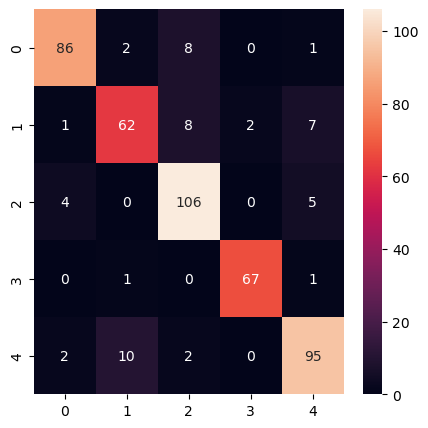




              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        97
         1.0       0.83      0.78      0.80        80
         2.0       0.85      0.92      0.89       115
         3.0       0.97      0.97      0.97        69
         4.0       0.87      0.87      0.87       109

    accuracy                           0.89       470
   macro avg       0.89      0.89      0.89       470
weighted avg       0.89      0.89      0.88       470



In [ ]:
import joblib
joblib.dump(clf, r'D:\University\Computer Vision\Project\Datasets\Classic.joblib')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(y_test, y_pred))

# Deep Learning

## Preprocceing

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,  preprocess_input
from tensorflow.keras.applications import VGG19
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2 
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [3]:
target_size = (229, 229)    # 229 Xception   224 VGG

train_dir = '/content/drive/MyDrive/Yoga_Dataset/TRAIN'
test_dir = '/content/drive/MyDrive/Yoga_Dataset/TEST'

train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   channel_shift_range=0.0,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale =1./255,
                                 validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (229,229),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                    batch_size = 16,
                                                   subset = 'training')
                                                   
validation_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                       target_size = (229,229),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                       batch_size = 16,
                                                       subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


## VGG19

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.applications import ResNet50


In [5]:
feature_extractor = ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
feature_extractor.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [6]:
for layer in feature_extractor.layers[0 : -4]:
    layer.trainable = False

feature_extractor.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [7]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten

In [8]:
inp_layer = Input(shape = (224, 224, 3))
features = feature_extractor(inp_layer)

flat = Flatten()(features)
FC1 = Dense(units = 300, activation = 'relu')(flat)
FC2 = Dense(units = 200, activation = 'relu')(FC1)
output = Dense(units = 5, activation = 'sigmoid')(FC2)

model = Model(inputs = inp_layer, outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 300)               30105900  
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 53,754,817
Trainable params: 31,221,825
Non-tra

In [9]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks_list = [es, lr_reduction]

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    batch_size=16,
                    callbacks=callbacks_list,
                    shuffle=True
                    )

Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 4.6604 - accuracy: 0.2298

55/55 [==============================] - 41s 612ms/step - loss: 4.6604 - accuracy: 0.2298 - val_loss: 8.9909 - val_accuracy: 0.2283 - lr: 0.0010
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 1.7562 - accuracy: 0.2875

55/55 [==============================] - 31s 576ms/step - loss: 1.7562 - accuracy: 0.2875 - val_loss: 2.2297 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 1.5582 - accuracy: 0.3372

55/55 [==============================] - 30s 548ms/step - loss: 1.5582 - accuracy: 0.3372 - val_loss: 1.4351 - val_accuracy: 0.4783 - lr: 0.0010
Epoch 4/25
55/55 [==============================] - ETA: 0s - loss: 1.3931 - accuracy: 0.4018

55/55 [==============================] - 31s 574ms/step - loss: 1.3931 - accuracy: 0.4018 - val_loss: 1.3662 - val_accuracy: 0.4239 - lr: 0.0010
Epoch 5/25
55/55 [==============================] - ETA: 0s - loss: 1.4247 - accuracy: 0.4157

55/55 [==============================] - 32s 594ms/step - loss: 1.4247 - accuracy: 0.4157 - val_loss: 0.8787 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 6/25
55/55 [==============================] - ETA: 0s - loss: 1.3872 - accuracy: 0.4330

55/55 [==============================] - 29s 536ms/step - loss: 1.3872 - accuracy: 0.4330 - val_loss: 1.1009 - val_accuracy: 0.5761 - lr: 0.0010
Epoch 7/25
55/55 [==============================] - ETA: 0s - loss: 1.4454 - accuracy: 0.3776

55/55 [==============================] - 29s 532ms/step - loss: 1.4454 - accuracy: 0.3776 - val_loss: 0.8395 - val_accuracy: 0.6087 - lr: 0.0010
Epoch 8/25
55/55 [==============================] - ETA: 0s - loss: 1.3797 - accuracy: 0.4088

55/55 [==============================] - 30s 538ms/step - loss: 1.3797 - accuracy: 0.4088 - val_loss: 0.8711 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 9/25
55/55 [==============================] - ETA: 0s - loss: 1.3483 - accuracy: 0.4134

55/55 [==============================] - 30s 540ms/step - loss: 1.3483 - accuracy: 0.4134 - val_loss: 1.4833 - val_accuracy: 0.5543 - lr: 0.0010
Epoch 10/25
55/55 [==============================] - ETA: 0s - loss: 1.3964 - accuracy: 0.3995

55/55 [==============================] - 30s 539ms/step - loss: 1.3964 - accuracy: 0.3995 - val_loss: 0.7385 - val_accuracy: 0.6630 - lr: 0.0010
Epoch 11/25
55/55 [==============================] - ETA: 0s - loss: 1.3074 - accuracy: 0.4423

55/55 [==============================] - 32s 582ms/step - loss: 1.3074 - accuracy: 0.4423 - val_loss: 0.7118 - val_accuracy: 0.6739 - lr: 0.0010
Epoch 12/25
55/55 [==============================] - ETA: 0s - loss: 1.3627 - accuracy: 0.4249

55/55 [==============================] - 31s 570ms/step - loss: 1.3627 - accuracy: 0.4249 - val_loss: 0.6838 - val_accuracy: 0.7935 - lr: 0.0010
Epoch 13/25
55/55 [==============================] - ETA: 0s - loss: 1.3410 - accuracy: 0.3995

55/55 [==============================] - 29s 534ms/step - loss: 1.3410 - accuracy: 0.3995 - val_loss: 0.8994 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 14/25
55/55 [==============================] - ETA: 0s - loss: 1.2888 - accuracy: 0.4561

55/55 [==============================] - 29s 532ms/step - loss: 1.2888 - accuracy: 0.4561 - val_loss: 0.9144 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 15/25
55/55 [==============================] - ETA: 0s - loss: 1.3615 - accuracy: 0.4088

55/55 [==============================] - 31s 573ms/step - loss: 1.3615 - accuracy: 0.4088 - val_loss: 0.7758 - val_accuracy: 0.6848 - lr: 0.0010
Epoch 16/25
55/55 [==============================] - ETA: 0s - loss: 1.2983 - accuracy: 0.4596

55/55 [==============================] - 31s 557ms/step - loss: 1.2983 - accuracy: 0.4596 - val_loss: 0.7814 - val_accuracy: 0.6630 - lr: 0.0010
Epoch 17/25
55/55 [==============================] - ETA: 0s - loss: 1.2811 - accuracy: 0.4642

55/55 [==============================] - 32s 570ms/step - loss: 1.2811 - accuracy: 0.4642 - val_loss: 0.6843 - val_accuracy: 0.7065 - lr: 0.0010


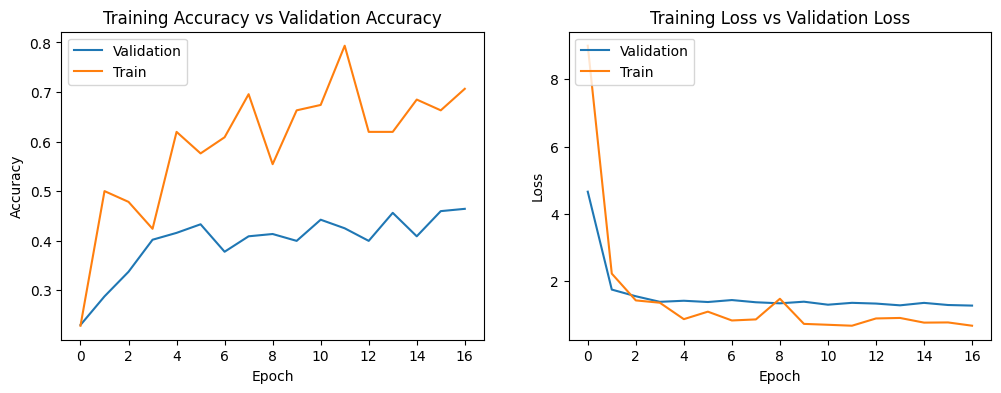

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Validation', 'Train'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Validation', 'Train'], loc='upper left')

plt.show()

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

6/6 [==============================] - 4s 522ms/step - loss: 0.6843 - accuracy: 0.7065
final train accuracy = 46.88 , validation accuracy = 70.65


In [12]:
y_val_org = []
for i in range( validation_generator.__len__() ):
    y_val_org.extend(
        validation_generator.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

In [13]:
ypreds = model.predict(validation_generator)
ypreds = np.argmax(ypreds, axis=1)

6/6 [==============================] - 4s 569ms/step


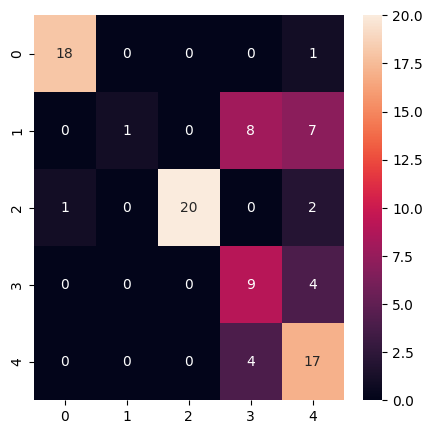




              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.06      0.12        16
           2       1.00      0.87      0.93        23
           3       0.43      0.69      0.53        13
           4       0.55      0.81      0.65        21

    accuracy                           0.71        92
   macro avg       0.78      0.68      0.64        92
weighted avg       0.81      0.71      0.67        92



In [14]:
cf_matrix = confusion_matrix(y_val_org, ypreds)

plt.figure(figsize=(5,5))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(y_val_org, ypreds))

In [ ]:
model.save('/content/drive/MyDrive/Models/ResNet50.h5')
model.save_weights('/content/drive/MyDrive/Models/ResNet50_weight.h5', overwrite=True, save_format=None, options=None)

## Xception

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.applications import Xception


In [5]:
feature_extractor = Xception(weights='imagenet', input_shape=(229, 229, 3), include_top=False)
feature_extractor.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 229, 229, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 114, 114, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 114, 114, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [6]:
for layer in feature_extractor.layers[0 : -3]:
    layer.trainable = False

feature_extractor.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 229, 229, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 114, 114, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 114, 114, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [7]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten

In [8]:
inp_layer = Input(shape = (229, 229, 3))
features = feature_extractor(inp_layer)

flat = Flatten()(features)
FC1 = Dense(units = 300, activation = 'relu')(flat)
FC2 = Dense(units = 200, activation = 'relu')(FC1)
output = Dense(units = 5, activation = 'sigmoid')(FC2)

model = Model(inputs = inp_layer, outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 229, 229, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 300)               30105900  
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 51,028,585
Trainable params: 33,330,753
Non-tra

In [9]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks_list = [es, lr_reduction]

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25,
                    batch_size=16,
                    callbacks=callbacks_list,
                    shuffle=True
                    )

Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 2.5326 - accuracy: 0.5023

55/55 [==============================] - 52s 634ms/step - loss: 2.5326 - accuracy: 0.5023 - val_loss: 0.2657 - val_accuracy: 0.8804 - lr: 0.0010
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 0.7971 - accuracy: 0.7217

55/55 [==============================] - 32s 587ms/step - loss: 0.7971 - accuracy: 0.7217 - val_loss: 0.2487 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 0.5562 - accuracy: 0.8014

55/55 [==============================] - 35s 639ms/step - loss: 0.5562 - accuracy: 0.8014 - val_loss: 0.4225 - val_accuracy: 0.8696 - lr: 0.0010
Epoch 4/25
55/55 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.8118

55/55 [==============================] - 35s 635ms/step - loss: 0.5260 - accuracy: 0.8118 - val_loss: 0.3852 - val_accuracy: 0.8696 - lr: 0.0010
Epoch 5/25
55/55 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8603

55/55 [==============================] - 34s 620ms/step - loss: 0.4485 - accuracy: 0.8603 - val_loss: 0.3063 - val_accuracy: 0.8804 - lr: 0.0010
Epoch 6/25
55/55 [==============================] - ETA: 0s - loss: 0.3971 - accuracy: 0.8753

55/55 [==============================] - 34s 620ms/step - loss: 0.3971 - accuracy: 0.8753 - val_loss: 0.1953 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 7/25
55/55 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8891

55/55 [==============================] - 34s 618ms/step - loss: 0.3448 - accuracy: 0.8891 - val_loss: 0.5926 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 8/25
55/55 [==============================] - ETA: 0s - loss: 0.3306 - accuracy: 0.8961

55/55 [==============================] - 32s 586ms/step - loss: 0.3306 - accuracy: 0.8961 - val_loss: 0.5009 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 9/25
55/55 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.9065

55/55 [==============================] - 33s 604ms/step - loss: 0.2932 - accuracy: 0.9065 - val_loss: 0.2784 - val_accuracy: 0.9457 - lr: 0.0010
Epoch 10/25
55/55 [==============================] - ETA: 0s - loss: 0.2916 - accuracy: 0.9030

55/55 [==============================] - 33s 600ms/step - loss: 0.2916 - accuracy: 0.9030 - val_loss: 0.4209 - val_accuracy: 0.9239 - lr: 0.0010
Epoch 11/25
55/55 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.9273

55/55 [==============================] - 32s 574ms/step - loss: 0.2693 - accuracy: 0.9273 - val_loss: 0.2658 - val_accuracy: 0.9239 - lr: 0.0010


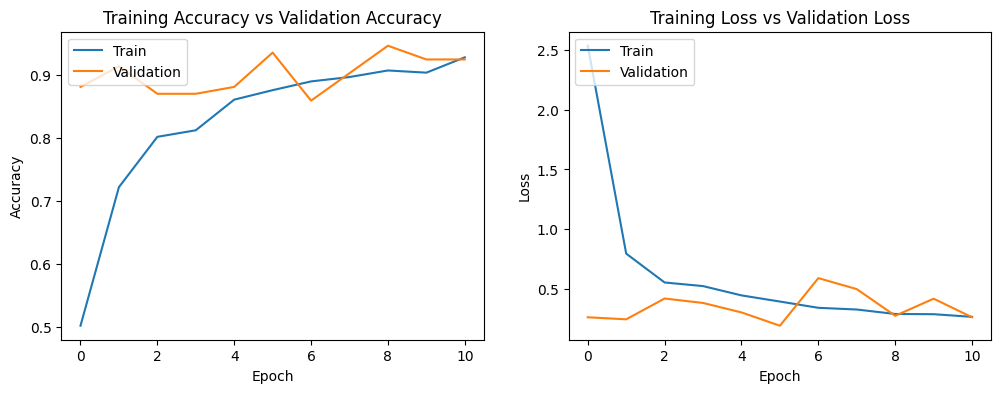

In [14]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

6/6 [==============================] - 3s 490ms/step - loss: 0.2658 - accuracy: 0.9239
final train accuracy = 95.27 , validation accuracy = 92.39


In [12]:
y_val_org = []
for i in range( validation_generator.__len__() ):
    y_val_org.extend(
        validation_generator.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

In [13]:
ypreds = model.predict(validation_generator)
ypreds = np.argmax(ypreds, axis=1)

6/6 [==============================] - 6s 972ms/step


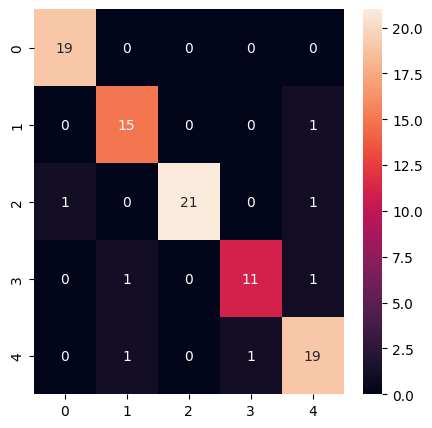




              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.88      0.94      0.91        16
           2       1.00      0.91      0.95        23
           3       0.92      0.85      0.88        13
           4       0.86      0.90      0.88        21

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.93      0.92      0.92        92



In [15]:
cf_matrix = confusion_matrix(y_val_org, ypreds)

plt.figure(figsize=(5,5))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(y_val_org, ypreds))

In [ ]:
model.save('/content/drive/MyDrive/Models/Xception.h5')
model.save_weights('/content/drive/MyDrive/Models/Xception_weight.h5', overwrite=True, save_format=None, options=None)

## Key points MediaPipe

In [ ]:
!pip install numpy==1.19.3
!pip install opencv-python==4.5.1.48
!pip install tqdm==4.56.0

!pip install mediapipe==0.8.3

In [ ]:

images_in_folder = '../input/yoga-poses-dataset/DATASET/TRAIN'

images_out_folder = 'fitness_poses_images_out_basic'

csv_out_path = 'fitness_poses_csvs_out_basic.csv'

In [ ]:
import csv
import cv2
import numpy as np
import os
import sys
import tqdm

from mediapipe.python.solutions import drawing_utils as mp_drawing
from mediapipe.python.solutions import pose as mp_pose

with open(csv_out_path, 'w') as csv_out_file:
    csv_out_writer = csv.writer(csv_out_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)

      # Folder names are used as pose class names.
    pose_class_names = sorted([n for n in os.listdir(images_in_folder) if not n.startswith('.')])

    for pose_class_name in pose_class_names:
        print('Bootstrapping ', pose_class_name, file=sys.stderr)
        if not os.path.exists(os.path.join(images_out_folder, pose_class_name)):
            os.makedirs(os.path.join(images_out_folder, pose_class_name))
        image_names = sorted([
            n for n in os.listdir(os.path.join(images_in_folder, pose_class_name))
            if not n.startswith('.')])
        for image_name in tqdm.tqdm(image_names, position=0):
          # Load image.
          input_frame = cv2.imread(os.path.join(images_in_folder, pose_class_name, image_name))
        input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

          # Initialize fresh pose tracker and run it.
        with mp_pose.Pose(upper_body_only=False) as pose_tracker:
            result = pose_tracker.process(image=input_frame)
            pose_landmarks = result.pose_landmarks

          # Save image with pose prediction (if pose was detected).
        output_frame = input_frame.copy()
        if pose_landmarks is not None:
            mp_drawing.draw_landmarks(
                image=output_frame,
                landmark_list=pose_landmarks,
                connections=mp_pose.POSE_CONNECTIONS)
        output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(images_out_folder, image_name), output_frame)

          # Save landmarks.
        if pose_landmarks is not None:
            # Check the number of landmarks and take pose landmarks.
            assert len(pose_landmarks.landmark) == 33, 'Unexpected number of predicted pose landmarks: {}'.format(len(pose_landmarks.landmark))
            pose_landmarks = [[lmk.x, lmk.y, lmk.z] for lmk in pose_landmarks.landmark]

            # Map pose landmarks from [0, 1] range to absolute coordinates to get
            # correct aspect ratio.
            frame_height, frame_width = output_frame.shape[:2]
            pose_landmarks *= np.array([frame_width, frame_height, frame_width])

            # Write pose sample to CSV.
            pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.str).tolist()
            csv_out_writer.writerow([image_name, pose_class_name] + pose_landmarks)

In [ ]:
import pandas as pd
df = pd.read_csv('./fitness_poses_csvs_out_basic.csv')
df.tail()

# Real Time

In [ ]:
import cv2
import time
import numpy as np
import joblib
import pickle
import copy
import tensorflow as tf
# for classic
#model = tf.keras.models.load_model(r'D:\University\Computer Vision\Project\Xception.h5')


##
cap = cv2.VideoCapture(r'D:\University\Computer Vision\Project\Yoga_Movie.mp4')  


frame_count = 0

start_time = time.time()

while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # img = cv2.resize(img, (229,229), interpolation = cv2.INTER_AREA)
    # img = img.reshape(1,229,229,3)/255.0
    ###  SVM+HOG
    x_x_x =[]
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
    img = img/255.0
    hog_features = hog(img, orientations=num_bins, pixels_per_cell=cell_size,
                           cells_per_block=block_size, visualize=False, multichannel=False)
    x_x_x.append(hog_features)
    X_test_hog = np.array(x_x_x)
    ###
    prediction = clf.predict(X_test_hog)
    #prediction=np.argmax(prediction)
    text_list = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
    if prediction == 0:
        text= text_list[0]
    if prediction == 1:
        text= text_list[1]
    elif prediction == 2:
        text= text_list[2]
    elif prediction == 3:
        text= text_list[3]
    elif prediction == 4:
        text= text_list[4]
    
    cv2.putText(frame, str(text), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Frame', frame)

    frame_count += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    fps = frame_count / elapsed_time

    print(f"FPS: {fps:.2f}")

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

FPS: 17.21
FPS: 14.35
FPS: 16.45
FPS: 16.56
FPS: 17.80
FPS: 18.42
FPS: 19.50
FPS: 20.66
FPS: 21.80
FPS: 22.63
FPS: 23.35
FPS: 23.81
FPS: 24.10
FPS: 24.56
FPS: 25.19
FPS: 25.69
FPS: 26.07
FPS: 26.51
FPS: 26.76
FPS: 26.92
FPS: 27.03
FPS: 27.13
FPS: 27.42
FPS: 27.76
FPS: 28.02
FPS: 28.24
FPS: 27.94
FPS: 28.16
FPS: 28.08
FPS: 28.15
FPS: 28.09
FPS: 28.00
FPS: 27.76
FPS: 27.83
FPS: 27.94
FPS: 28.10
FPS: 28.22
FPS: 28.35
FPS: 28.36
FPS: 28.26
FPS: 28.19
FPS: 28.31
FPS: 28.33
FPS: 28.48
FPS: 28.59
FPS: 28.54
FPS: 27.58
FPS: 27.75
FPS: 27.87
FPS: 28.00
FPS: 28.18
FPS: 28.22
FPS: 28.25
FPS: 28.33
FPS: 28.49
FPS: 28.62
FPS: 28.76
FPS: 28.87
FPS: 28.98
FPS: 29.10
FPS: 29.09
FPS: 29.03
FPS: 29.12
FPS: 19.19
FPS: 19.31
FPS: 19.11
FPS: 19.20
FPS: 19.32
FPS: 19.45
FPS: 19.57
FPS: 19.65
FPS: 19.75
FPS: 19.85
FPS: 19.98
FPS: 20.12
FPS: 20.23
FPS: 20.32
FPS: 20.41
FPS: 20.53
FPS: 20.65
FPS: 20.75
FPS: 20.88
FPS: 20.99
FPS: 21.11
FPS: 21.18
FPS: 21.27
FPS: 21.37
FPS: 21.48
FPS: 21.56
FPS: 21.66


With tracker

In [ ]:
import cv2
import time
import numpy as np
import joblib
import pickle
import copy
import tensorflow as tf
# for classic
model = tf.keras.models.load_model(r'D:\University\Computer Vision\Project\Xception.h5')


##
cap = cv2.VideoCapture(r'D:\University\Computer Vision\Project\worrier.mp4')  


frame_count = 0

start_time = time.time()

f_frame = None
S_frame = None 
kernel = np.ones((10,10), np.uint8)



while True:
    ret, f_frame = cap.read()

    if not ret:
        break
    if S_frame is None:
      S_frame = f_frame
      continue
    f_gray = cv2.cvtcolor
    x_x_x =[]
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (229,229), interpolation = cv2.INTER_AREA)
    img = img.reshape(1,229,229,3)/255.0
    #img = img/255.0
    # hog_features = hog(img, orientations=num_bins, pixels_per_cell=cell_size,
    #                        cells_per_block=block_size, visualize=False, multichannel=False)
    # x_x_x.append(hog_features)
    #X_test_hog = np.array(x_x_x)

    prediction = model.predict(img)
    prediction=np.argmax(prediction)
    print(prediction)
    text_list = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
    if prediction == 0:
        text= text_list[0]
    if prediction == 1:
        text= text_list[1]
    elif prediction == 2:
        text= text_list[2]
    elif prediction == 3:
        text= text_list[3]
    elif prediction == 4:
        text= text_list[4]
    
    cv2.putText(frame, str(text), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Frame', frame)

    frame_count += 1

    end_time = time.time()
    elapsed_time = end_time - start_time

    fps = frame_count / elapsed_time

    #print(f"FPS: {fps:.2f}")

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()